In [18]:
#import section 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py

ModuleNotFoundError: No module named 'plotly'

In [3]:
#data import 
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
data.head(5)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#rename columns
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
#data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [5]:
#display 10 countries with most attacks aver years 


most_agressive_countries = data['Country'].value_counts().index[0]
most_agressive_countries_counts = data['Country'].value_counts().index[1]

print(most_agressive_countries)
print(most_agressive_countries_counts)
#print(data['Country'].value_counts())
#plt.plot(data['Country'].value_counts())

Iraq
Pakistan


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

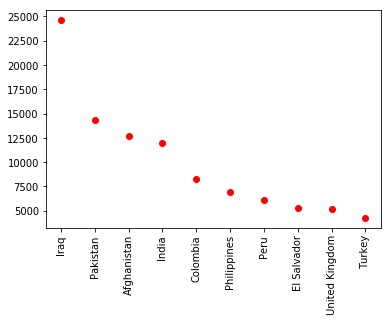

In [6]:
#display 10 countries with largest amount of attacks

data1 = data['Country'].value_counts()
data1 = data1[0:10]

plt.plot(data1, 'ro')
plt.xticks(rotation=90)

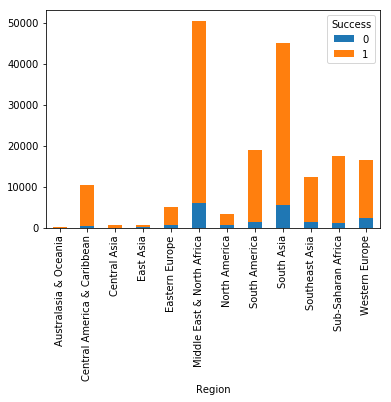

In [7]:
#check how many attack was succesfully stopped 
all_cases = len(data)

success_factor = pd.crosstab(data.Region, data.success)

success_factor.plot.bar(stacked=True)
plt.legend(title='Success')

plt.show()

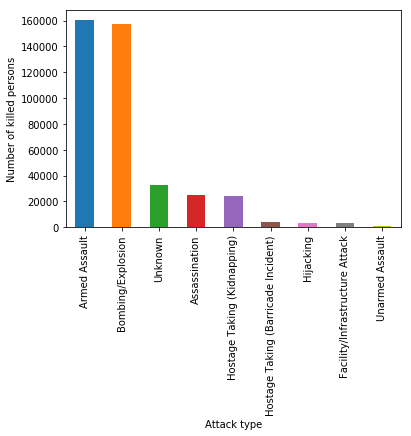

In [8]:
#killed statictics by attack type  

data_attack_killed = data.groupby('AttackType').Killed.sum().sort_values(ascending=False)
data_attack_killed.plot.bar(stacked=False)
plt.ylabel('Number of killed persons')
plt.xlabel('Attack type')
plt.show()


#data_groups.head()

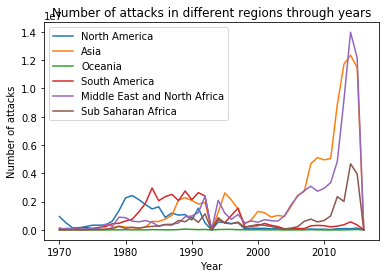

In [72]:
#Number of killed people through time by region

terror_years = np.arange(1970, 2017)

data_terrorism = data

def sorter(data_frame):
    a = 0 
    terror_years = np.arange(1970, 2016)
    data_return = np.empty([47])
    for i in terror_years:
        data_return[a]= data_frame[data_frame.Year == i].Year.sum()
        a = a + 1;
    return data_return;
        
data_north_america = data_terrorism[(data_terrorism.region == 1) |  (data_terrorism.region == 2)]
data_asia = data_terrorism[(data_terrorism.region == 4) | (data_terrorism.region == 5) | (data_terrorism.region == 6) | (data_terrorism.region == 7)]
data_oceania = data_terrorism[(data_terrorism.region == 12)]
data_europe = data_terrorism[(data_terrorism.region == 8) | (data_terrorism.region == 9)]
data_south_america = data_terrorism[(data_terrorism.region == 3)]
data_middle_east_n_africa = data_terrorism[(data_terrorism.region == 10)]
data_sub_africa = data_terrorism[(data_terrorism.region == 11)]

peryear_north_america = sorter(data_north_america)
peryear_asia = sorter(data_asia)
peryear_oceania = sorter(data_oceania)
peryear_europe = sorter(data_europe)
peryear_south_america = sorter(data_south_america)
peryear_middle_east_n_africa = sorter(data_middle_east_n_africa)
peryear_sub_africa = sorter(data_sub_africa)

plt.plot(terror_years,peryear_north_america, label='North America') 
plt.plot(terror_years,peryear_asia, label='Asia') 
plt.plot(terror_years,peryear_oceania, label='Oceania') 
plt.plot(terror_years,peryear_south_america, label='South America') 
plt.plot(terror_years,peryear_middle_east_n_africa, label='Middle East and North Africa') 
plt.plot(terror_years,peryear_sub_africa, label='Sub Saharan Africa') 
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of attacks in different regions through years')
plt.show()
